In [2]:
import pandas as pd
customer=pd.DataFrame({"customer_id":[101,102,103,104,105,106,107,108,109,110],"customer_name":['Ayush', 'Rohan','Neha','Priya','Aman','Sara','Karan','Meena','Vikram','Anjali'],"city":['Ranchi','Delhi','Mumbai','Delhi','Pune','Mumbai','Ranchi','Kolkata','Chennai','Delhi']})
customer
products=pd.DataFrame({"product_id":[1,2,3,4,5,6,7,8,9,10],"product_name":['Keyboard','Mouse','Notebook','Headphones','Pen Pack','USB Cable','Backpack','Desk Lamp','Diary','Water Bottle'],"category":['Electronics','Electronics','Stationery','Electronics','Stationery','Electronics','Accessories','Electronics','Stationery','Accessories']})
products
orders=pd.DataFrame({"order_id":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],"customer_id":[101,102,101,103,104,102,103,105,106,107,101,104,106,102,105,108,109,110,101,103,104,105,106,107,110],"product_id":[1,2,3,4,5,6,1,7,4,3,2,1,5,4,6,8,9,10,7,8,3,2,6,10,4],"quantity":[1,2,4,1,10,3,2,1,1,5,1,1,20,1,2,1,3,2,1,1,6,1,2,1,1],"price":[1500,500,60,2500,20,200,1500,1200,2500,60,500,1500,20,2500,200,1800,150,300,1200,1800,60,500,200,300,2500],"order_date":['2025-01-02','2025-01-03','2025-01-05','2025-01-06','2025-01-08','2025-01-09','2025-02-01','2025-02-02','2025-02-03','2025-02-04','2025-02-10','2025-02-12','2025-02-15','2025-03-01','2025-03-03','2025-03-05','2025-03-07','2025-03-08','2025-03-10','2025-03-12','2025-03-15','2025-03-18','2025-03-20','2025-03-22','2025-03-25']})
orders


,order_id,customer_id,product_id,quantity,price,order_date
0,1,101,1,1,1500,2025-01-02
1,2,102,2,2,500,2025-01-03
2,3,101,3,4,60,2025-01-05
3,4,103,4,1,2500,2025-01-06
4,5,104,5,10,20,2025-01-08
5,6,102,6,3,200,2025-01-09
6,7,103,1,2,1500,2025-02-01
7,8,105,7,1,1200,2025-02-02
8,9,106,4,1,2500,2025-02-03
9,10,107,3,5,60,2025-02-04


In [3]:
# Join Orders with customers
merged=pd.merge(orders,customer,on='customer_id',how='left')
merged.head()
# Join Results with products
merged=pd.merge(merged,products,on='product_id',how='left')
merged.head()
merged['revenue']=merged['quantity']*merged['price']
merged.head()


,order_id,customer_id,product_id,quantity,price,order_date,customer_name,city,product_name,category,revenue
0,1,101,1,1,1500,2025-01-02,Ayush,Ranchi,Keyboard,Electronics,1500
1,2,102,2,2,500,2025-01-03,Rohan,Delhi,Mouse,Electronics,1000
2,3,101,3,4,60,2025-01-05,Ayush,Ranchi,Notebook,Stationery,240
3,4,103,4,1,2500,2025-01-06,Neha,Mumbai,Headphones,Electronics,2500
4,5,104,5,10,20,2025-01-08,Priya,Delhi,Pen Pack,Stationery,200


Data Cleaning & Quality Checks

In [4]:
merged.isna().sum()
# Invalid Quantity or Price
merged[(merged['quantity']<=0)|(merged['price']<=0)]
# Duplicate orders
merged.duplicated().sum()
merged.dtypes
# Sanity Checks Revenue
merged[merged['revenue']<=0]


,order_id,customer_id,product_id,quantity,price,order_date,customer_name,city,product_name,category,revenue


In [5]:
merged.head()
merged.describe()
merged['revenue'].describe()
# Total Revenue by Customer
customer_revenue=merged.groupby("customer_name")['revenue'].sum().reset_index()
customer_revenue.sort_values(by='revenue',ascending=False)
# No of Orders per Customer
order_counts=merged.groupby('customer_name')['order_id'].count().reset_index(name='order_count')
order_counts.sort_values(by='order_count',ascending=False)
# Revenue by city
city_revenue=merged.groupby('city')['revenue'].sum().reset_index()
city_revenue.sort_values(by='revenue',ascending=False)
# Revenue by Product Category
category_revenue=merged.groupby('category')['revenue'].sum().reset_index()
category_revenue.sort_values(by='revenue',ascending=False)

,category,revenue
1,Electronics,23000
0,Accessories,3300
2,Stationery,1950


Revenue Distribution

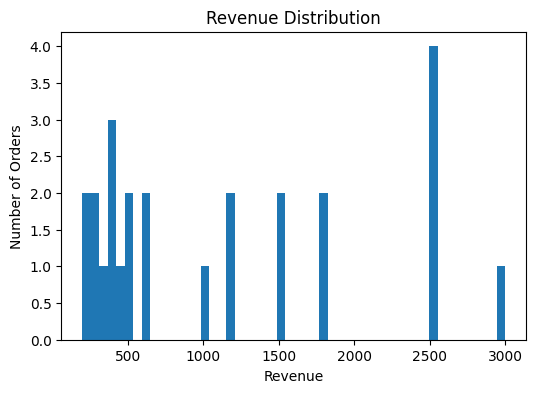

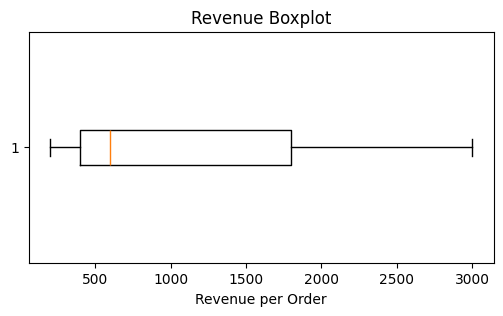

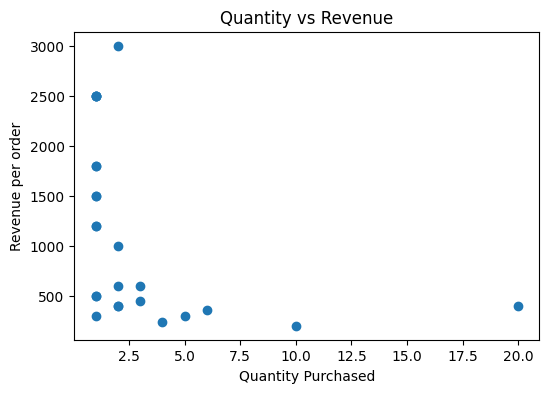

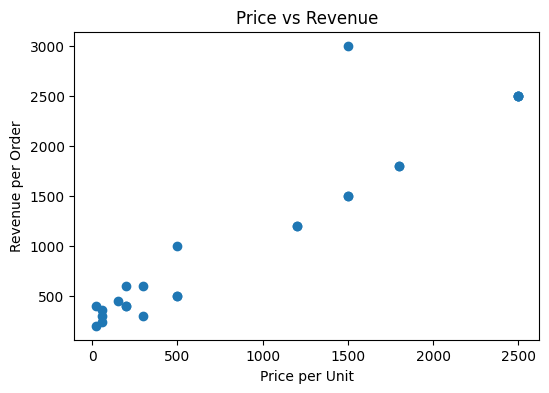

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(merged['revenue'],bins=50)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Number of Orders')
plt.show()
# Revenue Boxplot(Detect Unusual Extreme Values)
plt.figure(figsize=(6,3))
plt.boxplot(merged['revenue'],vert=False)
plt.title('Revenue Boxplot')
plt.xlabel('Revenue per Order')
plt.show()
# Scatter Plot Quantity vs Revenue
plt.figure(figsize=(6,4))
plt.scatter(merged['quantity'],merged['revenue'])
plt.title('Quantity vs Revenue')
plt.xlabel('Quantity Purchased')
plt.ylabel('Revenue per order')
plt.show()
# Price vs Revenue
plt.figure(figsize=(6,4))
plt.scatter(merged['price'],merged['revenue'])
plt.title('Price vs Revenue')
plt.xlabel('Price per Unit')
plt.ylabel('Revenue per Order')
plt.show()

In [44]:
# Total Spend per customer
customer_features=merged.groupby('customer_id')['revenue'].sum().reset_index(name='total_spend')
customer_features
# Number of Orders
order_counts=merged.groupby('customer_id')['order_id'].count().reset_index(name='order_count')
customer_features=customer_features.merge(order_counts,on='customer_id')
# Average Order Value
customer_features['avg_order_value']=customer_features['total_spend']/customer_features['order_count']
# Recency
latest_date=merged['order_date'].max()
recency=merged.groupby('customer_id')['order_date'].max().reset_index()
# Favourite Product per category
category_counts=merged.groupby(['customer_id','category'])['order_id'].count().reset_index(name='category_orders')
category_counts.head()
# Most frequent Category per customer
favourite_category=category_counts.sort_values("category_orders",ascending=False).drop_duplicates("customer_id")
favourite_category=favourite_category[['customer_id','category']]
favourite_category.rename(columns={"category":"favourite_category"},inplace=True)
# Merge into customer_features
customer_features=customer_features.merge(favourite_category,on='customer_id',how='left')
customer_features.head()
# Spending Distribution
customer_features['total_spend'].describe()
# High Value rule
threshold=customer_features['total_spend'].mean()
customer_features['high_value_customer']=(customer_features['total_spend']>threshold).astype(int)
customer_features
X=customer_features[['order_count','avg_order_value','favourite_category']]
y=customer_features['high_value_customer']
X=pd.get_dummies(X,columns=['favourite_category'],drop_first=True)
X.head()

,order_count,avg_order_value,favourite_category_Electronics,favourite_category_Stationery
0,4,860.000000,True,False
1,3,1366.666667,True,False
2,3,2433.333333,True,False
3,3,686.666667,False,True
4,3,700.000000,True,False


Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]


<Axes: ylabel='Feature'>

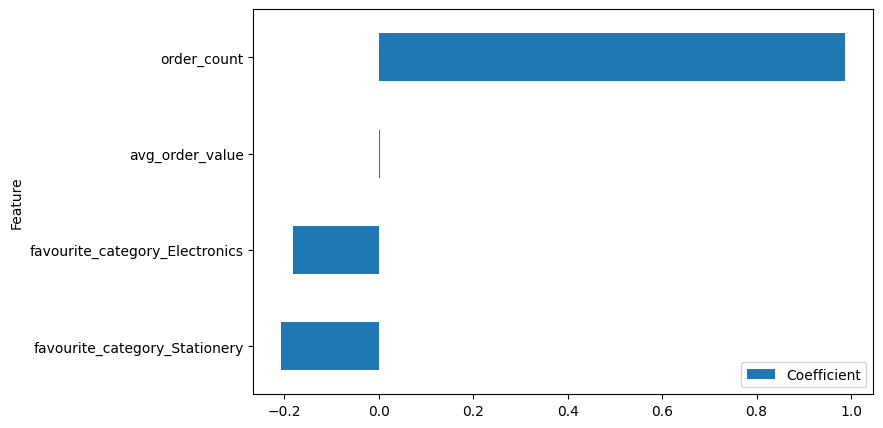

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,predictions))
coefficients=pd.DataFrame({"Feature":X.columns,"Coefficient":model.coef_[0]})
coefficients.sort_values(by="Coefficient",ascending=False)
coefficients.sort_values(by="Coefficient").plot(x="Feature",y="Coefficient",kind="barh",figsize=(8,5))